# Математическая статистика
## Домашнее задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 - 15 баллов
* Задача 2 - 30 баллов
* Задача 3 - 30 баллов

<b><font color="orange">Сложная часть</font></b>:
* Задача 4 - 25 баллов
* Задача 5 - 20 баллов


-----

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import time

### Задача 1  
Создайте матрицу 10x10 по правилу:  
- если сумма индексов элемента четна - присваиваем элементу значение 0
- если сумма индексов элемента нечетна - присваиваем элементу значение 1

Используйте numpy. Визуализируйте полученную матрицу с помощью `plt.imshow()`.

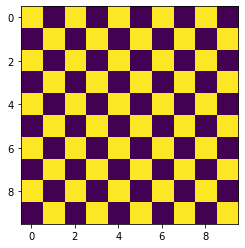

In [51]:
matrix = np.ones((10, 10), dtype = int)
#matrix = [[1  if (i+j)%2 == 0 else 0 for i in range (10)] for j in range (10)]
for i in range (10):
    for j in range (10):
        if (i+j)%2:
            matrix[i][j] = 0 
plt.imshow(matrix)

### Задача 2
Изобразите график параметрически заданной функции. Переменные необходимо задавать с помощью Numpy.

$$ x=\alpha\times\left(\cos t+\frac{cos(\beta t)}{\beta}\right)$$

$$y=\alpha\times\left(\sin t−\frac{sin(\beta t)}{\beta}\right)$$

$$t∈[0;20π]$$ 

1. Реализуйте функции $x(t, \alpha, \beta)$ и $y(t, \alpha, \beta)$

In [52]:
def x(t, a, b):
    x = a * (np.cos(t) + np.cos(b*t)/b)
    return x
def y(t, a, b):
    y = a * (np.sin(t) - np.sin(b*t)/b)
    return y

2. Постройте график в осях $x$ и $y$ при $\alpha=4$ и $\beta=1.1$. Подпишите оси.

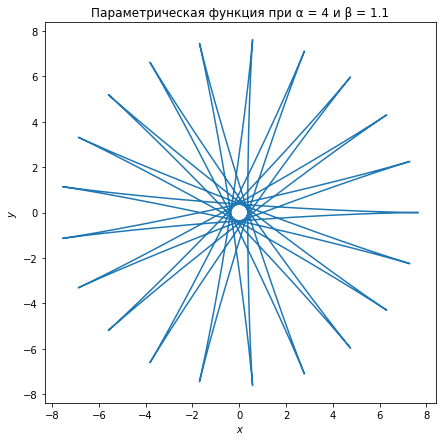

In [54]:
t = np.linspace(0, 20 * np.pi, 1000)

plt.figure(figsize=(7,7))
plt.title("Параметрическая функция при α = 4 и β = 1.1")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x(t, 4, 1.1), y(t, 4, 1.1))
plt.show()

3. Постройте графики для различных значений $\alpha$ и $\beta$.  
- $\alpha$ : [2, 4, 6, 8, 10]  
- $\beta$ : [1.2, 1.8, 2, 5, 10]  

У вас должна получиться сетка 5х5 графиков. На каждом графике укажите параметры $\alpha$ и $\beta$.

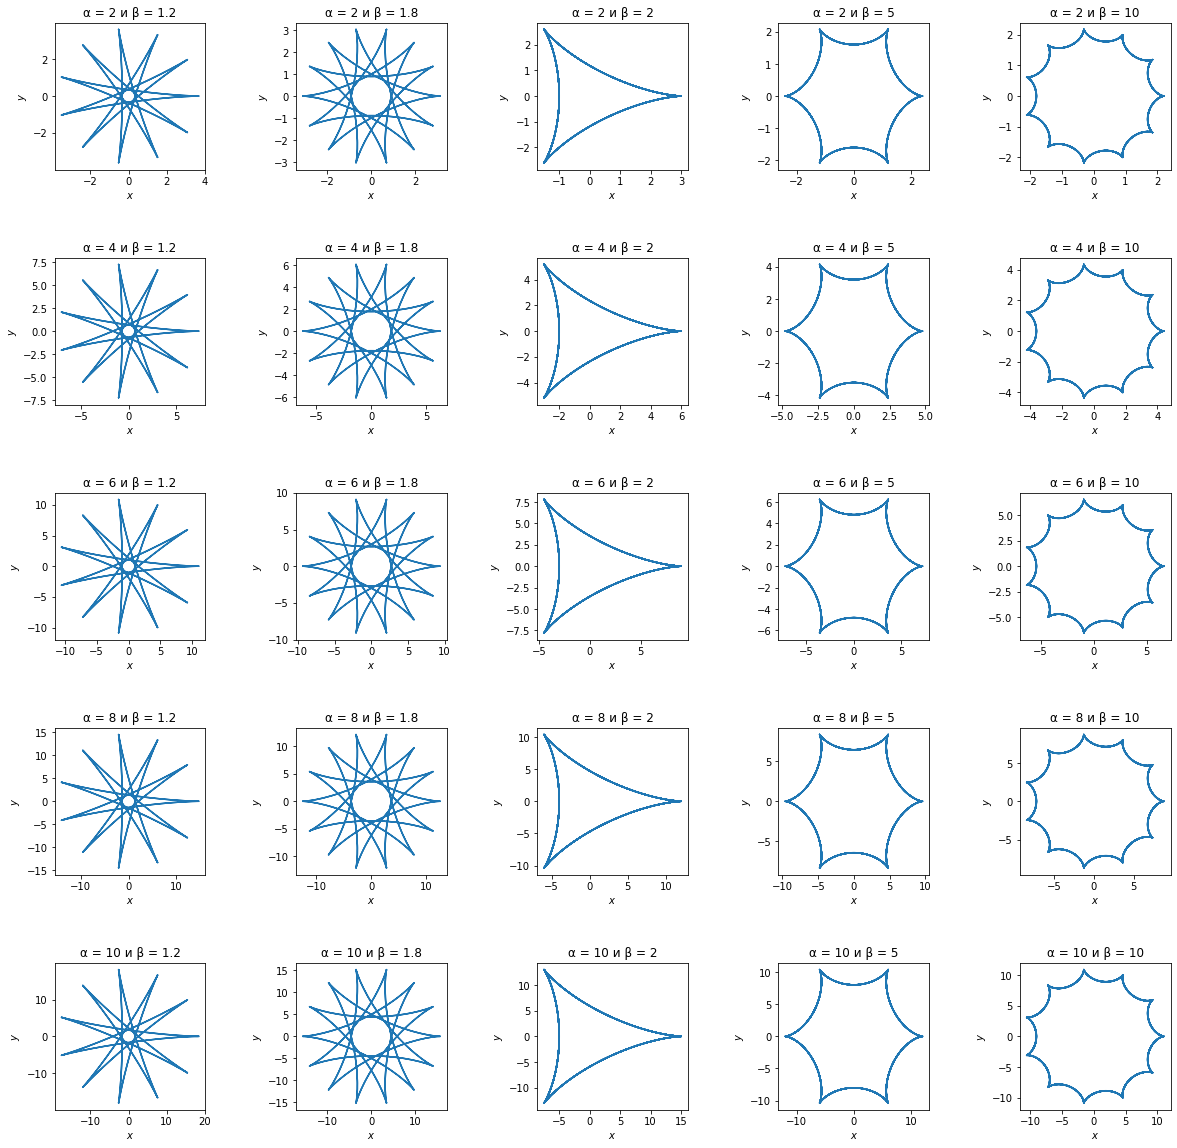

In [55]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (20, 20))
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) #добавляем пространство между графиками
a = [2, 4, 6, 8, 10]
b = [1.2, 1.8, 2, 5, 10]

for i in range(5):
    for j in range(5):
        axes[i][j].set_title("α = " + str(a[i]) + " и β = " + str(b[j]))
        axes[i][j].set_xlabel('$x$')
        axes[i][j].set_ylabel('$y$')
        axes[i][j].plot(x(t, a[i], b[j]), y(t, a[i], b[j]))

plt.show()

### Задача 3
- Создайте матрицу NхN, каждый элемент которой равен сумме индексов этого элемента, где N число из [10, 100, 1000, 10000]. Используйте циклы. Визуализируйте с помощью `plt.imshow()`. Для каждого N замерьте время работы вашего кода (это можно сделать с помощью библиотеки `time`).


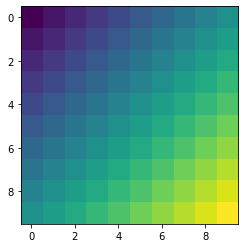

0.19366145133972168 seconds


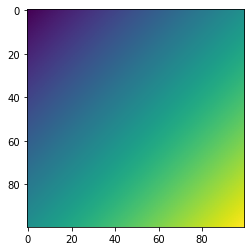

0.11381959915161133 seconds


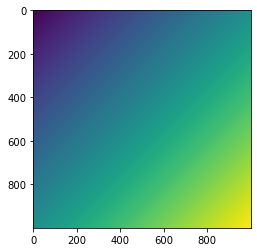

0.6790585517883301 seconds


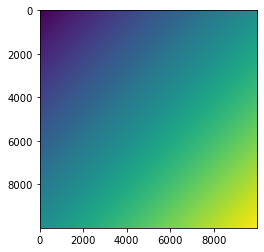

55.227991342544556 seconds


In [56]:
N = [10, 100, 1000, 10000]
time_list = []
for n in N:
    start_time = time.time() # засекаем время работы программы
    matrix = np.ones((n, n), dtype = int)
    for i in range (n):
        for j in range (n):
            matrix[i][j] = i+j
    plt.imshow(matrix)
    plt.show()
    time_n = time.time() - start_time
    time_list.append(time_n)
    print(time_n, "seconds")


- Сделайте вывод о временной сложности вашего алгоритма. Постройте график зависимости времени от N.


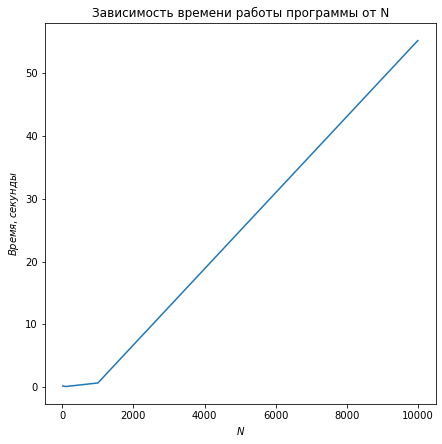

In [60]:
plt.figure(figsize=(7,7))
plt.title("Зависимость времени работы программы от N")
plt.xlabel("$N$")
plt.ylabel("$Время, секунды$")
plt.plot(N, time_list)
plt.show()

Временная сложность не линейна, время работы растёт намного быстрее

- Повторите прогон вашего с алгоритма для N = 1000000. Что вы наблюдаете?

In [61]:
n = 1000000
start_time = time.time() # засекаем время работы программы
matrix = np.ones((n, n), dtype = int)
for i in range (n):
    for j in range (n):
        matrix[i][j] = i+j
plt.imshow(matrix)
plt.show()
time_n = time.time() - start_time
print(time_n, "seconds")

MemoryError: Unable to allocate 3.64 TiB for an array with shape (1000000, 1000000) and data type int32

Для решения задачи для матрицы 1000x1000 код выше яляется неэффективным - требуется слишком много памяти, из-за нехватки выводится ошибка

### Задача 4
Повторите свое решение задачи 3 <font color='red'> без использования циклов (list comprehension тоже считается циклом). 

Замерьте время исполнения программы и сравните с кодом, вклюячающим циклы. Сделайте вывод.

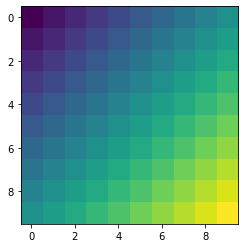

0.2251415252685547 seconds


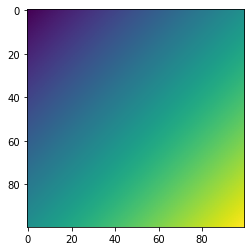

0.12194657325744629 seconds


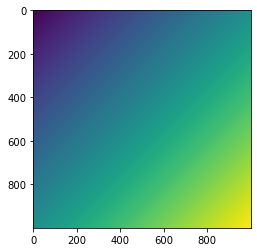

0.17135930061340332 seconds


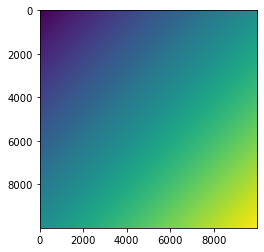

8.789216995239258 seconds


In [67]:
N = [10, 100, 1000, 10000]
time_list = []
for n in N: # этот цикл исключительно, чтобы отобразить все графики в одном окне, можно и без него просто последовательно
    start_time = time.time() # засекаем время работы программы
    indices = np.indices((n, n))
    matrix = indices.sum(axis=0)
    plt.imshow(matrix)
    plt.show()
    time_n = time.time() - start_time
    time_list.append(time_n)
    print(time_n, "seconds")


Программа без циклов, а с использованием np.indices() работает гораздо быстрее, за счёт того, что использует меньше памяти для хранения значений.

### Задача 5

Выполните все шаги, описанные ниже и визуализируйте полученный результат. Результатом является квадратная матрица.

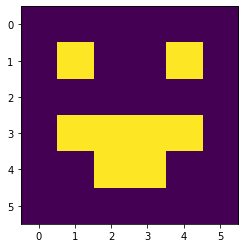

In [111]:
# Создать матрицу а1 размера 3 x 3 из нулей
a1 = np.zeros((3,3), dtype = int)
# Приравнять единице значения матрицы a1 по координатам (1, 1)
a1[1][1] = 1
# Скопировать матрицу a1 в матрицу a2
a2 = np.copy(a1)
# Конкатенировать матрицы a1 и a2 по оси 1 и записать результат в матрицу a3
a3 = np.concatenate((a1, a2), axis=1)
# Создать матрицу a4 размера 6 из нулей
a4 = np.zeros((1,6))
# Запонить всё единицами кроме нулевой и последней ячейки в матрице a4
a4[:] = 1
a4[0,0] = 0
a4[-1,-1] = 0
# Создать матрицу a5 размера 6 из нулей
a5 = np.zeros((1,6))
# Заполнить ячейки с координатами 2 и 3 единицами в матрице а5
a5[0,2] = 1
a5[0,3] = 1
# Объединить матрицы а4 и а5 по нулевой оси и записать результат в матрицу а6
a6 = np.concatenate((a4, a5), axis=0)
# Создать матрицу а7 размера 6 из нулей
a7 = np.zeros((1,6))
# Конкатенировать матрицы а6 и а7 по нулевой оси и записать результат в матрицу а8
a8 = np.concatenate((a6, a7), axis=0)
# Конкатенировать матрицы а3 и а8 по нулевой оси и записать результат в матрицу а9
a9 = np.concatenate((a3, a8), axis=0)
# Визуализировать матрицу а9 с помощью plt.imshow()
plt.imshow(a9)

Если ты считаешь, что тебе нужно больше практики рекоммендуем эти ресурсы:
- [Тренажер по numpy](https://github.com/rougier/numpy-100?utm_referrer=https://dzen.ru/media/id/5e048b1b2b616900b081f1d9/65805c3b83225d541b5a26be)
- [Тренажер по pandas](https://www.machinelearningplus.com/python/101-pandas-exercises-python/?utm_referrer=https://dzen.ru/media/id/5e048b1b2b616900b081f1d9/65805c3b83225d541b5a26be)
- [Cборник курсов от Kaggle](https://www.kaggle.com/learn)

Если совсем тяжело с питоном, посмотри эти страницы:
- [Базовые навыки владения Python](https://pythontutor.ru/)
- [Адаптивный тренажер](https://stepik.org/course/431/info)